In [2]:
# Step 1: Import necessary libraries
# pandas for data manipulation and analysis
import pandas as pd
# numpy for numerical operations
import numpy as np
# train_test_split for splitting data into training and testing sets
from sklearn.model_selection import train_test_split
# StandardScaler for scaling numerical features to ensure fair comparison
from sklearn.preprocessing import StandardScaler
# LinearRegression for building the regression model
from sklearn.linear_model import LinearRegression
# Evaluation metrics: Mean Absolute Error, Mean Squared Error, R-squared
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
# matplotlib for plotting the regression line and visualizations
import matplotlib.pyplot as plt

In [3]:
# Step 2: Load the dataset
# Assuming the dataset is provided as 'Titanic-Dataset.csv'
# Load the CSV file into a DataFrame
data = pd.read_csv('C:/Users/USER/OneDrive/Desktop/AI,ML INTERNSHIP/Titanic-Dataset.csv')

In [4]:
# Step 3: Preprocess the data
# Handle missing values
# Impute missing 'Age' with the median to avoid bias from outliers
data['Age'].fillna(data['Age'].median(), inplace=True)
# Impute missing 'Embarked' with the mode (most frequent value)
data['Embarked'].fillna(data['Embarked'].mode()[0], inplace=True)
# Impute missing 'Fare' with the median, if any, to maintain data integrity
data['Fare'].fillna(data['Fare'].median(), inplace=True)

# Drop unnecessary columns
# 'Cabin' has too many missing values, making it unreliable for prediction
# 'PassengerId', 'Name', 'Ticket', and 'Survived' are not relevant for predicting 'Fare'
data.drop(columns=['Cabin', 'PassengerId', 'Name', 'Ticket', 'Survived'], inplace=True)

# Encode categorical variables
# Convert 'Sex' to binary (0 for male, 1 for female) for numerical compatibility
data['Sex'] = data['Sex'].map({'male': 0, 'female': 1})
# One-hot encode 'Embarked' to create dummy variables for each port (C, Q, S)
# drop_first=True avoids multicollinearity by dropping the first category
data = pd.get_dummies(data, columns=['Embarked'], drop_first=True)

# Feature engineering
# Create a new feature 'FamilySize' as the sum of siblings/spouses and parents/children
# This captures the total family size, which may influence fare
data['FamilySize'] = data['SibSp'] + data['Parch']

# Define features (X) and target (y)
# All columns except 'Fare' are features
X = data.drop('Fare', axis=1)
# 'Fare' is the target variable (continuous, suitable for linear regression)
y = data['Fare']

# Scale numerical features
# Scaling ensures all numerical features contribute equally to the model
# StandardScaler standardizes features to have mean=0 and variance=1
scaler = StandardScaler()
# List of numerical features to scale (excluding categorical ones already encoded)
numerical_features = ['Age', 'SibSp', 'Parch', 'FamilySize']
# Apply scaling to numerical features
X[numerical_features] = scaler.fit_transform(X[numerical_features])

C:\Users\USER\AppData\Local\Temp\ipykernel_14616\932074947.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Age'].fillna(data['Age'].median(), inplace=True)
C:\Users\USER\AppData\Local\Temp\ipykernel_14616\932074947.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For e

In [5]:
# Step 4: Split the data into train and test sets
# Use 80% for training and 20% for testing to balance learning and evaluation
# random_state=42 ensures reproducibility of the split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Print shapes to verify the split
print(f"Training set shape: {X_train.shape}, Test set shape: {X_test.shape}")

Training set shape: (712, 8), Test set shape: (179, 8)


In [6]:
# Step 5: Fit the linear regression model
# Initialize the LinearRegression model
lin_reg = LinearRegression()
# Train the model on the training data
lin_reg.fit(X_train, y_train)
# Make predictions on the test data for evaluation
y_pred = lin_reg.predict(X_test)

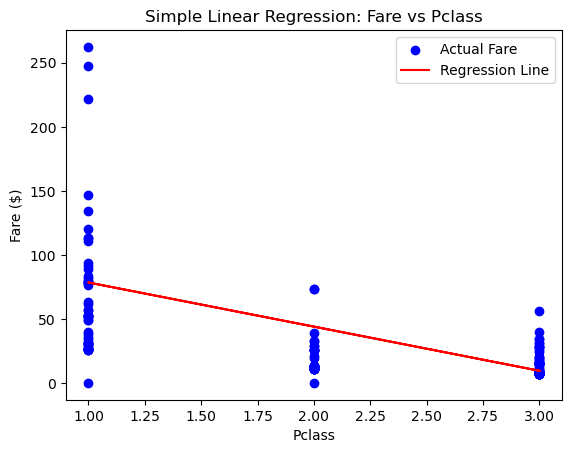

In [7]:
# Step 7: Plot the regression line for simple linear regression (Fare vs Pclass)
# Create a simple linear regression model with only 'Pclass' as the feature
X_train_simple = X_train[['Pclass']]
X_test_simple = X_test[['Pclass']]
lin_reg_simple = LinearRegression()
lin_reg_simple.fit(X_train_simple, y_train)
y_pred_simple = lin_reg_simple.predict(X_test_simple)

# Plot the actual data points and the regression line
plt.scatter(X_test_simple, y_test, color='blue', label='Actual Fare')
plt.plot(X_test_simple, y_pred_simple, color='red', label='Regression Line')
plt.xlabel('Pclass')
plt.ylabel('Fare ($)')
plt.title('Simple Linear Regression: Fare vs Pclass')
plt.legend()
plt.show()

In [8]:
# Step 8: Interpret the coefficients
# Extract coefficients from the multiple linear regression model
coefficients = pd.Series(lin_reg.coef_, index=X.columns)
# Sort coefficients for better readability
print("Coefficients (sorted by magnitude):")
print(coefficients.sort_values(ascending=False))

Coefficients (sorted by magnitude):
Parch          6.205100
FamilySize     5.093381
Sex            3.606345
SibSp          2.916630
Age           -1.040140
Embarked_Q   -13.938094
Embarked_S   -21.187405
Pclass       -33.932664
dtype: float64
